In [ ]:

from pptx import Presentation
from pptx.util import Inches
from pptx.enum.text import PP_ALIGN
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import mysql.connector
import pandas as pd


# 1. Koneksi ke MySQL

print("🔌 Menghubungkan ke database...")
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="", 
    database="data_scraping"
)
cursor = db.cursor()
print("✅ Koneksi berhasil!")


# 2. Ambil data aset dari database
cursor.execute("SELECT nama_aset FROM data_aset")
rows = cursor.fetchall()
df = pd.DataFrame(rows, columns=["nama_aset"])

# Simpan ke Excel dan Analisis
excel_file = "data_aset.xlsx"

# Hitung analisis tambahan
jumlah_total = len(df)
jumlah_unik = df['nama_aset'].nunique()
rata_panjang_nama = df['nama_aset'].str.len().mean()
aset_terpendek = df.loc[df['nama_aset'].str.len().idxmin(), 'nama_aset']
aset_terpanjang = df.loc[df['nama_aset'].str.len().idxmax(), 'nama_aset']

# Buat DataFrame analisis
summary_data = {
    "Kategori": ["Total Aset", "Jumlah Unik", "Rata-rata Panjang Nama", "Nama Aset Terpendek", "Nama Aset Terpanjang"],
    "Nilai": [jumlah_total, jumlah_unik, round(rata_panjang_nama, 2), aset_terpendek, aset_terpanjang]
}
df_summary = pd.DataFrame(summary_data)




🔌 Menghubungkan ke database...
✅ Koneksi berhasil!


In [ ]:


# 3. Menampilkan Nama Aset dalam Kolom

import math

# Tentukan jumlah kolom yang diinginkan
jumlah_kolom = 3

# Ambil daftar nama aset dan hapus nilai yang kosong
nama_aset_list = df['nama_aset'].dropna().astype(str).tolist()

# Hitung jumlah baris yang diperlukan
jumlah_baris = math.ceil(len(nama_aset_list) / jumlah_kolom)

# Tambahkan string kosong untuk melengkapi baris terakhir jika diperlukan
while len(nama_aset_list) < jumlah_baris * jumlah_kolom:
    nama_aset_list.append('')

# Bagi daftar nama aset menjadi beberapa kolom
kolom_data = [nama_aset_list[i * jumlah_baris:(i + 1) * jumlah_baris] for i in range(jumlah_kolom)]

# Transposisi data untuk mencetak baris per baris
for baris in zip(*kolom_data):
    print("".join(nama.ljust(30) for nama in baris))



Electric Vehicle Population DataNational Student Loan Data SystemWarehouse and Retail Sales    
Crime Data from 2020 to PresentBorder Crossing Entry Data    Dynamic Small Business Search (DSBS)
National Death Index          Harmonized Tariff Schedule of the United States (2024)Motor Vehicle Collisions - Crashes
Harmonized Tariff Schedule of the United States (2025)U.S. Chronic Disease IndicatorsNutrition, Physical Activity, and Obesity - Behavioral Risk Factor Surveillance System
Air Quality                   Lottery Powerball Winning Numbers: Beginning 2010Death rates for suicide, by sex, race, Hispanic origin, and age: United States
Supply Chain Greenhouse Gas Emission Factors v1.3 by NAICS-6FDIC Failed Bank List         Inventory of Owned and Leased Properties (IOLP)
Fruit and Vegetable Prices    Electric Vehicle Population DataNational Student Loan Data System
National Obesity By State     Crime Data from 2020 to PresentBorder Crossing Entry Data    
Warehouse and Retail Sales    N

C:\Users\USER\AppData\Local\Temp\ipykernel_24552\3521400857.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


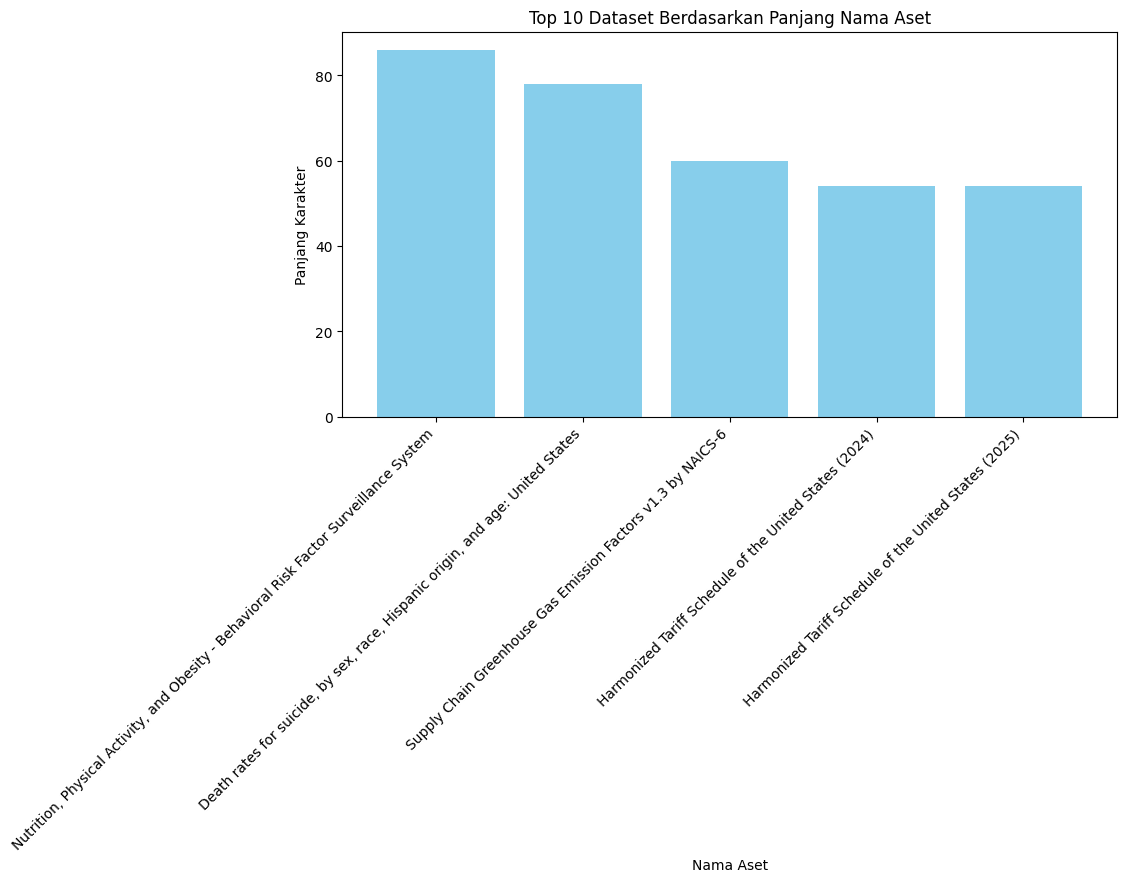

In [ ]:


# 4. Bar Chart Visualization

top_10 = df.copy()
top_10['panjang'] = top_10['nama_aset'].str.len()
top_10_sorted = top_10.sort_values(by='panjang', ascending=False).head(10)


plt.figure(figsize=(10,5))
plt.bar(top_10_sorted['nama_aset'], top_10_sorted['panjang'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Dataset Berdasarkan Panjang Nama Aset")
plt.xlabel("Nama Aset")
plt.ylabel("Panjang Karakter")
plt.tight_layout()
plt.show()


In [9]:


# Buat objek Presentasi
prs = Presentation()

# Slide 1: Judul Presentasi
slide_1 = prs.slides.add_slide(prs.slide_layouts[0])
title = slide_1.shapes.title
subtitle = slide_1.placeholders[1]
title.text = "Proyek Scraping Data Aset"
subtitle.text = "Menganalisis dan Visualisasi Data dari Data.gov"
print("Slide 1 (Judul) berhasil dibuat.")

# Slide 2: Tujuan Proyek
slide_2 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_2.shapes.title
title.text = "Tujuan Proyek"
content = slide_2.shapes.placeholders[1]
content.text = "1. Melakukan scraping data aset dari Data.gov\n" \
               "2. Menyimpan hasil ke MySQL\n" \
               "3. Melakukan analisis dan visualisasi data\n" \
               "4. Membuat presentasi otomatis"
print("Slide 2 (Tujuan Proyek) berhasil dibuat.")

# Slide 3: Word Cloud Visualization
slide_3 = prs.slides.add_slide(prs.slide_layouts[5])
title = slide_3.shapes.title
title.text = "Word Cloud: Nama Aset"
print("Slide 3 (Word Cloud) berhasil dibuat.")

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['nama_aset']))

# Simpan Word Cloud sebagai gambar sementara
wordcloud_image = "wordcloud_image.png"
wordcloud.to_file(wordcloud_image)
print(f"Word Cloud disimpan sebagai {wordcloud_image}")

# Masukkan gambar Word Cloud ke slide
slide_3.shapes.add_picture(wordcloud_image, Inches(0.5), Inches(1.5), width=Inches(9))

# Slide 4: Bar Chart Visualization
slide_4 = prs.slides.add_slide(prs.slide_layouts[5])
title = slide_4.shapes.title
title.text = "Top 10 Dataset Berdasarkan Panjang Nama Aset"
print("Slide 4 (Bar Chart) berhasil dibuat.")

# Buat Bar Chart
top_10_datasets = df['nama_aset'].str.len().sort_values(ascending=False).head(10)
top_10_datasets.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title('Top 10 Dataset Berdasarkan Panjang Nama Aset')
plt.xlabel('Dataset')
plt.ylabel('Panjang Nama')
plt.xticks(rotation=45, ha='right')

# Simpan Bar Chart sebagai gambar sementara
bar_chart_image = "bar_chart_image.png"
plt.savefig(bar_chart_image, bbox_inches='tight')
plt.close()
print(f"Bar Chart disimpan sebagai {bar_chart_image}")

# Masukkan gambar Bar Chart ke slide
slide_4.shapes.add_picture(bar_chart_image, Inches(0.5), Inches(1.5), width=Inches(9))

# Slide 5: Penutupan
slide_5 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_5.shapes.title
title.text = "Penutupan"
content = slide_5.shapes.placeholders[1]
content.text = "Terima kasih atas perhatian Anda!\n\nProyek ini menyajikan insight dan visualisasi data aset dari Data.gov."
print("Slide 5 (Penutupan) berhasil dibuat.")

# Simpan PowerPoint
presentation_file = 'presentation.pptx'
prs.save(presentation_file)
print(f"Presentasi berhasil disimpan sebagai {presentation_file}")

# Tutup koneksi database
cursor.close()
db.close()

print("Proses selesai.")


Slide 1 (Judul) berhasil dibuat.
Slide 2 (Tujuan Proyek) berhasil dibuat.
Slide 3 (Word Cloud) berhasil dibuat.
Word Cloud disimpan sebagai wordcloud_image.png
Slide 4 (Bar Chart) berhasil dibuat.
Bar Chart disimpan sebagai bar_chart_image.png
Slide 5 (Penutupan) berhasil dibuat.


PermissionError: [Errno 13] Permission denied: 'presentation.pptx'